In [1]:
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)
    

# Import SymPy: 
from sympy import * 
    
# Define variables:
g,T,L = symbols("g, T, L")
dg,dT,dL = symbols("sigma_g, sigma_T, sigma_L")

# Perimeter:
# Define relation, and print:
g = L*((2*pi/T)**2)
lprint(latex(Eq(symbols('g'),g)))

# Calculate uncertainty and print:
dg = sqrt((g.diff(L) * dL)**2 + (g.diff(T) * dT)**2)
lprint(latex(Eq(symbols('sigma_g'), dg)))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

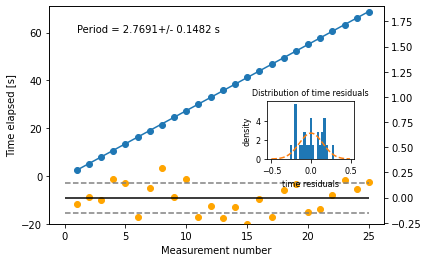

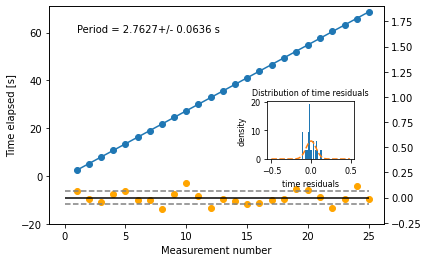

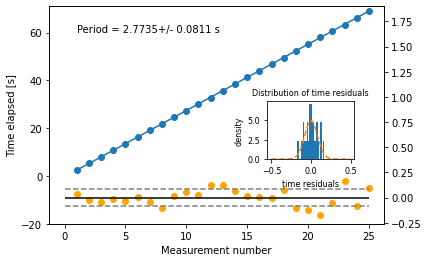

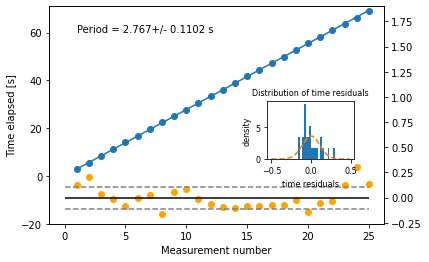

Chi2 test: 0.011194784392089653 1.557763454143436e-05


In [23]:
#######################################################
###### Read in T, and get T and its uncertainty #######
#######################################################

import os
import glob
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import chisquare

# Change working directory to where you store the data ---------------------
os.chdir("/Users/helenleft/Desktop/Applied_statistics/Project_1_g/Pendulum/")
filenames = sorted(glob.glob("*.dat"))

# Set an array to save each T and its uncertainty
Arr_T_sd = np.zeros((4,4))  # slope(T), sd, chi2, p

for i in range(0, np.size(filenames),1):

    t = np.loadtxt(filenames[i], unpack = True)
    t = np.transpose(t)
  
    x = t[:,0]
    y = t[:,1]

    x_re = t[:,0].reshape((-1,1))
    y_re = t[:,1].reshape((-1,1))
    
    
    # Fitting the linear model with intercept of 0
    model = LinearRegression(fit_intercept = True)

    T_lm = model.fit(x_re,y_re)

    intercept = T_lm.intercept_
    slope = T_lm.coef_
    slope = slope.round(4)

    T_pred = model.predict(x_re)

    T_diff = T_pred - y_re
    T_diff_re = np.reshape(T_diff,(1,25))
    T_diff_re = T_diff_re.squeeze()

    sd = np.std(T_diff_re)
    sd = sd.round(4)
    
    # chi2 test goodness of fit
    T_pred_re = T_pred.reshape((1,25))
    T_pred_re = np.squeeze(T_pred_re)
    T_pred_re = [round(T_pred_re[j],4) for j in range(0,25)]
    T_pred_re = np.array(T_pred_re)
    
    
    ## Chi2 test
    chi2 = np.sum((T_diff_re*T_diff_re)/(sd*sd))
    p = stats.chi2.sf(chi2 , 23)
    
    
    
    Arr_T_sd[i,0] = slope  # T
    Arr_T_sd[i,1] = sd    # Uncertainty
    Arr_T_sd[i,2] = chi2 # Chi2 value
    Arr_T_sd[i,3] = p   # p-value
    
    
    #######################################
    ### Plot for all T after regression ###
    #######################################

    fig, main_ax = plt.subplots()

    main_ax.plot(x, T_pred_re)
    main_ax.scatter(x, y)
    

    main_ax.set_xlabel('Measurement number')
    main_ax.set_ylabel('Time elapsed [s]')
    main_ax.text(1, 60.0, "Period = "+ str( Arr_T_sd[i,0].round(4)) +"+/- " + str(sd.round(4)) + " s")
    main_ax.set_ylim([-20,70+1])
    
    
    # second y axis
    main_ax2 = main_ax.twinx()
    main_ax2.scatter(x, T_diff_re,c = "orange")
    main_ax2.set_ylim([-0.26,1.9])
    main_ax2.hlines(y=0,xmin = 0.0, xmax = 25.0, colors = "black",linestyles='solid')
    main_ax2.hlines(y=sd,xmin = 0.0, xmax = 25.0, colors = "grey",linestyles='dashed')
    main_ax2.hlines(y=-sd,xmin = 0.0, xmax = 25.0, colors = "grey",linestyles='dashed')
    #main_ax.set_title('Gaussian colored noise')


    # this is an inset axes over the main axes
    right_inset_ax = fig.add_axes([0.63, 0.35, 0.2, 0.2])
    right_inset_ax.hist(T_diff_re, 20, density= True)



    ## Add best fit line
    bins = np.arange(-0.5,0.5,0.01)
    hist_y = ((1 / (np.sqrt(2 * np.pi) * sd)) *
     np.exp(-0.5 * (1 / sd * (bins - np.mean(T_diff_re)))**2))
    right_inset_ax.plot(bins,hist_y,"--")


    right_inset_ax.set_title('Distribution of time residuals',fontsize=8) #, xticks=[], yticks=[]
    right_inset_ax.tick_params(axis='both', labelsize=8)
    right_inset_ax.set_xlabel('time residuals',fontsize = 8)
    right_inset_ax.set_ylabel('density',fontsize = 8)
    
    # Save plot
    filename_start = "T_"
    filename_end = ".png"
    plt.savefig(filename_start + str(i+1) + filename_end, dpi=600, bbox_inches='tight', pad_inches=0.5, format='png',transparent=True)
 
    plt.show()
    
    
np.savetxt("T_result.csv", Arr_T_sd, delimiter =",", fmt = '%5.4f')

# Get final T and uncertainty

T_i = Arr_T_sd[:,0]
sigma_Ti = Arr_T_sd[:,1]

T_fl = np.sum(T_i/(sigma_Ti*sigma_Ti))/np.sum(1/(sigma_Ti*sigma_Ti))
sigma_T_fl = np.sqrt(1/np.sum(1/(sigma_Ti*sigma_Ti)))


## Chi2 test for all T 
T_diff = T_i - T_fl

T_chi2 = np.sum(T_diff**2/(sigma_Ti*sigma_Ti))
T_p = stats.chi2.sf(chi2, 3)

print('Chi2 test:', T_chi2, T_p)







In [24]:
######################################################
###### Read in L and get L and its uncertainty #######
######################################################
from numpy import genfromtxt

data_L = genfromtxt('Pendulum length-1.csv', delimiter=',', skip_header = 1)

#############
## L_13 #####


# L1 + L2 + L3 (before and after)
L_13_bf = data_L[:,1] * 0.01  # * 0.01  convert the unit to meter
L_13_aft = data_L[:,4] * 0.01
L_13_data = np.array([L_13_bf,L_13_aft])
L_13_data = np.transpose(L_13_data)


L13_i = (L_13_bf + L_13_aft)/2
L13_sigma_i = np.std(L_13_data,axis = 1)



## mean L_13
L_13 = np.sum(L13_i/(L13_sigma_i*L13_sigma_i))/np.sum(1/(L13_sigma_i*L13_sigma_i))
sigma_L13 = np.sqrt(1/np.sum(1/(L13_sigma_i*L13_sigma_i)))

print("L_13 = ",L_13)
print('sigma_L13 = ',sigma_L13)

## Chi2 test for L1 + L2 + L3
L13_diff = L13_i - L_13
L13_chi2 = np.sum((L13_diff*L13_diff)/(L13_sigma_i*L13_sigma_i))
L13_p = stats.chi2.sf(L13_chi2, 3)

print("L13_chi2 = ",L13_chi2)
print("L13_p = ", L13_p)



#################
### L4 ##########

# L4
L4 = np.mean(data_L[:,2]) * 0.01
L4_sd = np.std(data_L[:,2]) * 0.01


###################
### Calculate L ###
L = L_13 + 0.5 * L4
sigma_L = np.sqrt(sigma_L13**2 + (0.5**2)*(L4_sd**2))

print("L = ", L)
print("sigma_L",sigma_L)


L_13 =  1.896053102291783
sigma_L13 =  0.0002364257795702935
L13_chi2 =  6.199552822806147
L13_p =  0.10229503960171939
L =  1.908670602291783
sigma_L 0.00024148685108183642


In [25]:
######################################################
###### RCalculate g and get its uncertainty #######
######################################################

### Final g

g_new = L * ((2*np.pi/T_fl)**2) 
sigma_g_new = np.sqrt(64*(np.pi**4)*(L**2)*(sigma_T_fl**2)/(T_fl**6) + 16*(np.pi**4)*(sigma_L**2)/(T_fl**4))

print("g = ", g_new)
print("sigma_g = ",sigma_g_new)
#############################
### Contribution to error ###
#############################

print(sigma_g_new/g_new)

print(sigma_T_fl/T_fl)

print(sigma_L/L)


g =  9.841470665483536
sigma_g =  0.3098249766341175
0.0314815729442501
0.015740659353160397
0.00012652096741673383
